In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tx, ids = load_csv_data(DATA_TRAIN_PATH)

## Selection of model parameters

In [3]:
from param_selection import gamma_grid_search, lambda_grid_search

folder_path = '../figs/'
k_fold = 4

In [4]:
gammas = np.logspace(-5, -1, 10)

loss_logreg, loss_ls_GD, loss_ls_SGD = gamma_grid_search(y, tx, gammas, k_fold)

1
2
3
4
5


/Users/Nicolas/Desktop/MA3/ML/ML/project1/scripts/implementations.py:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


6
7
8
9
10


In [5]:
def plot_gamma_search(gammas, losses, folder_path):

    fig, axes = plt.subplots(1, 3, figsize=(12, 5))

    xlabels = ['logistic_regression', 'least_squares_GD', 'least_squares_SGD']

    for ax_nb in range(3):
        
        loss = np.array(losses[ax_nb])
        axes[ax_nb].semilogx(gammas, loss[:, 0], marker=".", color='b', label='train loss')
        axes[ax_nb].semilogx(gammas, loss[:, 1], marker="x", color='r', label='test loss')
        if ax_nb==0:
            axes[ax_nb].set_ylabel("loss") 
        if ax_nb==2:
            axes[ax_nb].set_ylim([0.125, 0.2])
            
        axes[ax_nb].set_xlabel(xlabels[ax_nb])
        axes[ax_nb].grid(True)
        axes[ax_nb].legend(loc="upper right")

    fig.suptitle('Gamma grid search')
    plt.tight_layout()
    plt.savefig((folder_path+'gammas'))
    plt.show()

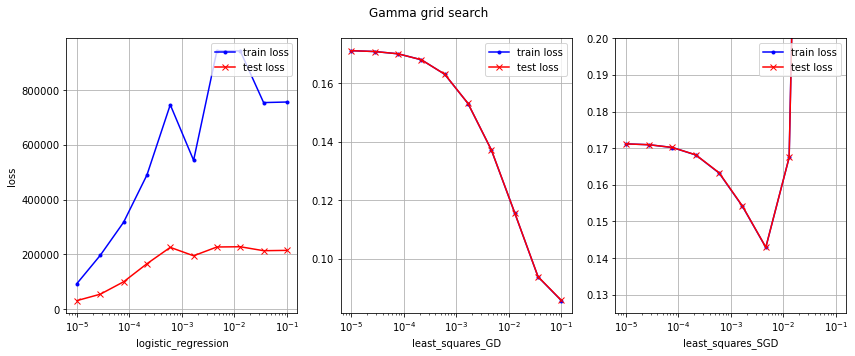

In [6]:
plot_gamma_search(gammas, [loss_logreg, loss_ls_GD, loss_ls_SGD], folder_path)

In [7]:
print(gammas)

[1.00000000e-05 2.78255940e-05 7.74263683e-05 2.15443469e-04
 5.99484250e-04 1.66810054e-03 4.64158883e-03 1.29154967e-02
 3.59381366e-02 1.00000000e-01]


In [8]:
lambdas = np.logspace(-5, 0, 15)
loss_logreg_reg, loss_ridge = lambda_grid_search(y, tx, lambdas, k_fold)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [9]:
def plot_lambda_search(lambdas, losses, folder_path):

    fig, axes = plt.subplots(1, 2, figsize=(8, 5))

    xlabels = ['reg_logistic_regression', 'ridge_regression']

    for ax_nb in range(2):
        
        loss = np.array(losses[ax_nb])
        if ax_nb==0:
            axes[ax_nb].semilogx(lambdas, loss[:, 0], marker=".", color='b', label='train loss')
            axes[ax_nb].set_ylabel("loss")
        else:
            axes[ax_nb].semilogx(lambdas, loss[:, 0], marker=".", color='b', label='train loss')
            axes[ax_nb].semilogx(lambdas, loss[:, 1], marker="x", color='r', label='test loss')
        axes[ax_nb].set_xlabel(xlabels[ax_nb])
        axes[ax_nb].grid(True)
        axes[ax_nb].legend(loc="upper right")

    fig.suptitle('Lambda grid search')
    plt.tight_layout()
    plt.savefig((folder_path+'lambdas'))
    plt.show()

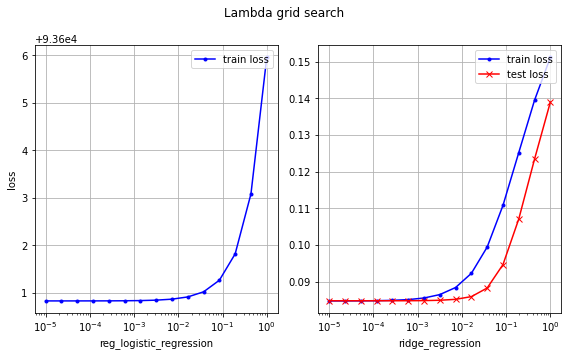

In [10]:
plot_lambda_search(lambdas, [loss_logreg_reg, loss_ridge], folder_path)

## Compare the performance of the models (accuracy)

In [11]:
from param_selection import compare_models

In [12]:
gamma_logreg = 1e-5
gamma_logreg_reg = gamma_logreg
gamma_ls_GD = 1e-1
gamma_ls_SGD = 4e-3
gammas = [gamma_logreg, gamma_logreg_reg, gamma_ls_GD, gamma_ls_SGD]

lambda_logreg_reg = 1e-3
lambda_ridge = 1e-4
lambdas = [lambda_logreg_reg, lambda_ridge]

In [13]:
acc_ls_GD, acc_ls_SGD, acc_ls, acc_ridge, acc_logreg, acc_logreg_reg = compare_models(y, tx, gammas, lambdas, k_fold, degree=1)

In [14]:
print(acc_ls_GD[0] * 100, acc_ls_SGD[0] * 100, acc_ls[0]* 100, acc_ridge[0]* 100, acc_logreg[0]* 100, acc_logreg_reg[0]* 100) #Mean

74.46160000000002 69.0548 74.65119999999999 74.6552 75.1596 75.1596


In [15]:
print(acc_ls_GD[1]* 100, acc_ls_SGD[1]* 100, acc_ls[1]* 100, acc_ridge[1]* 100, acc_logreg[1]* 100, acc_logreg_reg[1]* 100) #std

0.11377170122662224 0.9487611290519868 0.12336093384860611 0.11827831584868219 0.09640829839801314 0.09640829839801314


## Polynomials grid search

In [16]:
from param_selection import pol_degree_grid_search

In [17]:
degrees = np.arange(2, 15)

acc_ls, acc_ridge = pol_degree_grid_search(y, tx, k_fold, degrees)
accuracies = [acc_ls, acc_ridge]

In [18]:
def plot_pol_search(degrees, accuracies, folder_path):

    fig, axes = plt.subplots(1, 2, figsize=(8, 5), sharey=True)

    xlabels = ['least_squares', 'ridge_regression']

    for ax_nb in range(2):
        
        axes[ax_nb].plot(degrees, accuracies[ax_nb], marker=".", color='b')
        if ax_nb==0:
            axes[ax_nb].set_ylabel("Accuracy")
        axes[ax_nb].set_xlabel(xlabels[ax_nb])
        axes[ax_nb].set_xticks(range(1,15))
        axes[ax_nb].grid(True)

    fig.suptitle('Polynomial degree grid search')
    plt.tight_layout()
    plt.savefig((folder_path+'pols'))
    plt.show()

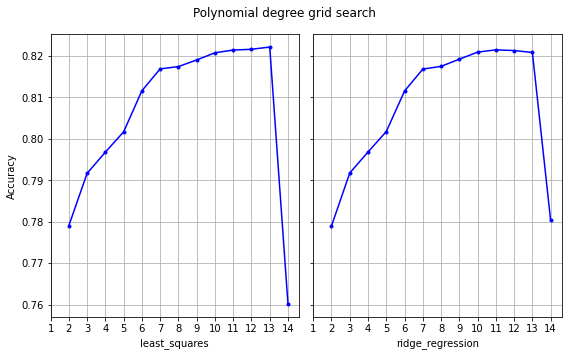

In [19]:
plot_pol_search(degrees, accuracies, folder_path)

In [20]:
print(acc_ls, acc_ridge)

[0.779036 0.791668 0.796788 0.801684 0.811604 0.816892 0.817444 0.81904
 0.820772 0.82144  0.82162  0.82216  0.760112] [0.778968 0.791764 0.796816 0.80176  0.81154  0.816836 0.817496 0.819232
 0.820932 0.82148  0.821316 0.820848 0.780284]


## ROC

In [21]:
from roc_auc import roc
from implementations import least_squares

In [22]:
x_train, x_test, y_train, y_test = split_data(tx, y, 0.7)

x_train_cleaned, _, _ = modify_missing_data(x_train, -999, 0.9, x_train)
x_test_cleaned, _, _ = modify_missing_data(x_test, -999, 0.9, x_train)

x_train_cleaned_normalized, x_test_cleaned_normalized = standardize_cat(x_train_cleaned, x_test_cleaned)

x_train_onehot = one_hot(x_train_cleaned_normalized)
x_test_onehot = one_hot(x_test_cleaned_normalized)

degree = 13

x_train_poly = build_poly(x_train_onehot, degree)
x_test_poly = build_poly(x_test_onehot, degree)

initial_w = np.zeros(x_train_poly.shape[1])

weights, loss = least_squares(y_train, x_train_poly)
y_pred = predict_labels(weights, x_test_poly)

thresholds = np.linspace(0, 1, 11)

auc, fprs, tprs = roc(x_test_poly, y_test, weights, thresholds)

Threshold : 0.0 

Threshold adjusted: -1.0
True positive : 25652, True negative : 9132, False negative : 212, False positive : 40004 

Sensitivity : 0.9918032786885246, Specificity : 0.1858515141647672 

Threshold : 0.1 

Threshold adjusted: -0.8
True positive : 25264, True negative : 17172, False negative : 600, False positive : 31964 

Sensitivity : 0.9768017321373338, Specificity : 0.3494789970693585 

Threshold : 0.2 

Threshold adjusted: -0.6
True positive : 24355, True negative : 26113, False negative : 1509, False positive : 23023 

Sensitivity : 0.9416563563253944, Specificity : 0.5314433409312928 

Threshold : 0.30000000000000004 

Threshold adjusted: -0.3999999999999999
True positive : 22782, True negative : 33944, False negative : 3082, False positive : 15192 

Sensitivity : 0.8808382307454377, Specificity : 0.6908173233474438 

Threshold : 0.4 

Threshold adjusted: -0.19999999999999996
True positive : 20542, True negative : 40022, False negative : 5322, False positive : 911

In [23]:
def plot_roc(auc, fprs, tprs, folder_path):
    print(f'Area under the Curve (AUC) : {auc}')
    
    plt.title('Receiver Operating Characteristic')
    plt.plot(fprs, tprs, 'b', marker='x', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.savefig((folder_path+'roc'))
    plt.show()

Area under the Curve (AUC) : 0.688498453422983


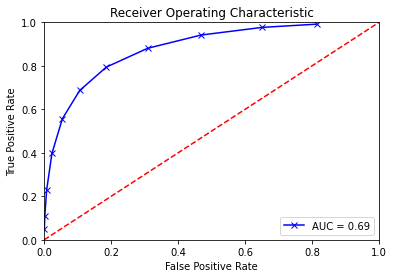

In [24]:
plot_roc(auc, fprs, tprs, folder_path)